# Stage 2020-2021

# Active Learning appliqué aux films conducteurs transparents 

## 1- Importation des bibliothèques nécessaires

### a) Bibliothèques usuelles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

### b) Bibliothèques du Machine Learning

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR

### c) Bibliothèques de l'Active Learning

In [3]:
from modAL.models import ActiveLearner, CommitteeRegressor
from modAL.uncertainty import uncertainty_sampling
from modAL.disagreement import max_std_sampling

## 2- Importation des données 

In [4]:
data = pd.read_table("C:/Users/salma/OneDrive/Bureau/Stage 2020-2021/Machine Learning/Publications/Electrode_publication/Data/DOE(GSD)_1stRUN_avec32.data", sep=',')
data

,Set,Cu_content,Temperature (°C),Time (min),EDTA,FoM (μS),no.of samples
0,1,0.65,60,30,0.02,138.0,3
1,2,0.65,60,60,0.03,178.0,3
2,3,0.65,60,90,0.07,110.0,3
3,4,0.65,60,120,0.10,148.0,3
4,5,0.65,70,30,0.03,193.0,3
5,6,0.65,70,60,0.07,184.0,3
6,7,0.65,70,90,0.10,18.2,3
7,8,0.65,70,120,0.02,32.8,3
8,9,0.65,80,30,0.07,54.0,3
9,10,0.65,80,60,0.10,35.2,3


In [5]:
data.shape

(32, 7)

**a)** On sépare les facteurs et la variable cible.

In [6]:
X = data[["Cu_content",'Temperature (°C)','Time (min)','EDTA']]
Y = data['FoM (μS)']

on transforme le dataframe en une matrice (numpy)

In [7]:
X_raw=X.to_numpy()
Y_raw=Y.to_numpy()

**b)** On choisit les premières instances étiquetées  

In [8]:
racine = 1
n_initial = X_raw.shape[0] 
size = 15
random.seed(racine)
lab_indices =  random.sample(range(n_initial), size)
print(lab_indices)

[8, 18, 27, 25, 24, 2, 31, 3, 15, 14, 23, 20, 12, 6, 29]


In [9]:
# Les données étiquetées.
X_lab = X_raw[lab_indices]
Y_lab = Y_raw[lab_indices] 

In [10]:
# Les données non-étiquetées.
X_unlab = np.delete(X_raw, lab_indices, axis=0) 
Y_unlab = np.delete(Y_raw, lab_indices, axis=0)

In [11]:
Y_unlab

array([138. , 178. , 193. , 184. ,  32.8,  35.2,  72. ,  62.9, 101. ,
        31. , 103. ,  33.9,  24.9,  11. ,  81.9,  12.2, 149. ])

# Active Learning :

In [12]:
def strat_max(pred, X_unlab, Y_unlab) :
    m = max(pred)
    query_index = np.argmax(pred)
    query_instance = X_unlab[query_index]
    label_index = Y_unlab[query_index]
    return query_index, query_instance, m

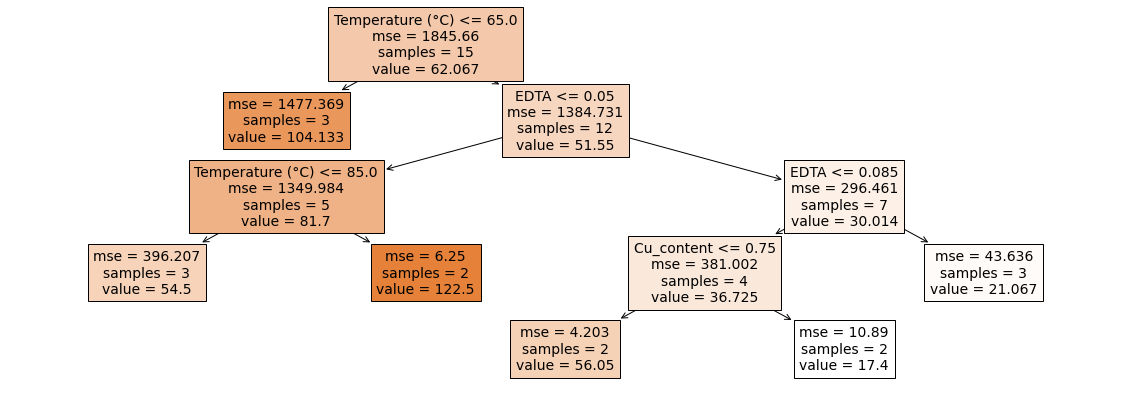

[104.13333333 104.13333333  54.5         56.05        54.5
  21.06666667  54.5         54.5        122.5        104.13333333
 104.13333333 104.13333333  17.4         21.06666667  54.5
  21.06666667 122.5       ]
8


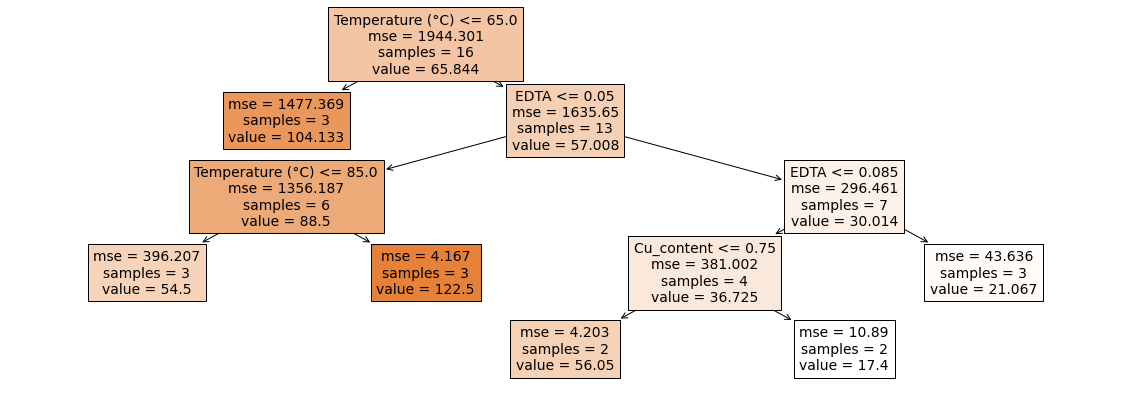

[104.13333333 104.13333333  54.5         56.05        54.5
  21.06666667  54.5         54.5        104.13333333 104.13333333
 104.13333333  17.4         21.06666667  54.5         21.06666667
 122.5       ]
15


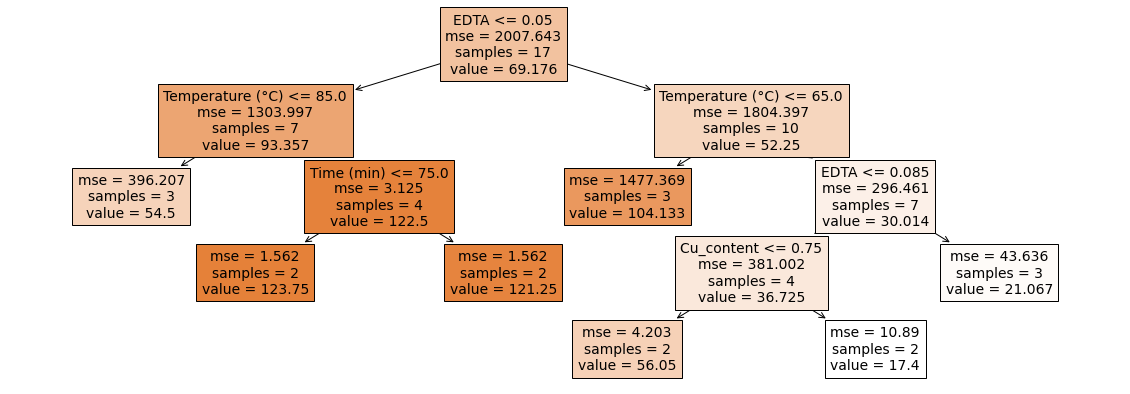

[ 54.5         54.5         54.5         56.05        54.5
  21.06666667  54.5         54.5         54.5         54.5
 104.13333333  17.4         21.06666667  54.5         21.06666667]
10


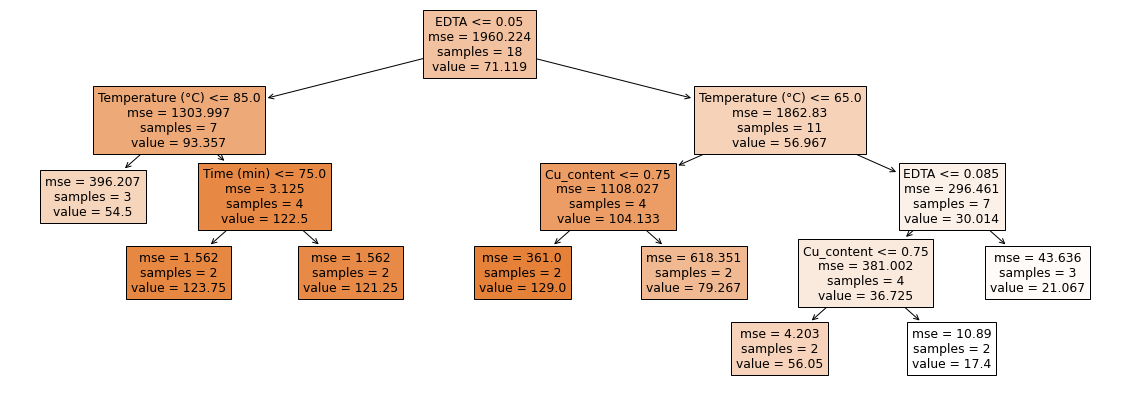

[54.5        54.5        54.5        56.05       54.5        21.06666667
 54.5        54.5        54.5        54.5        17.4        21.06666667
 54.5        21.06666667]
3


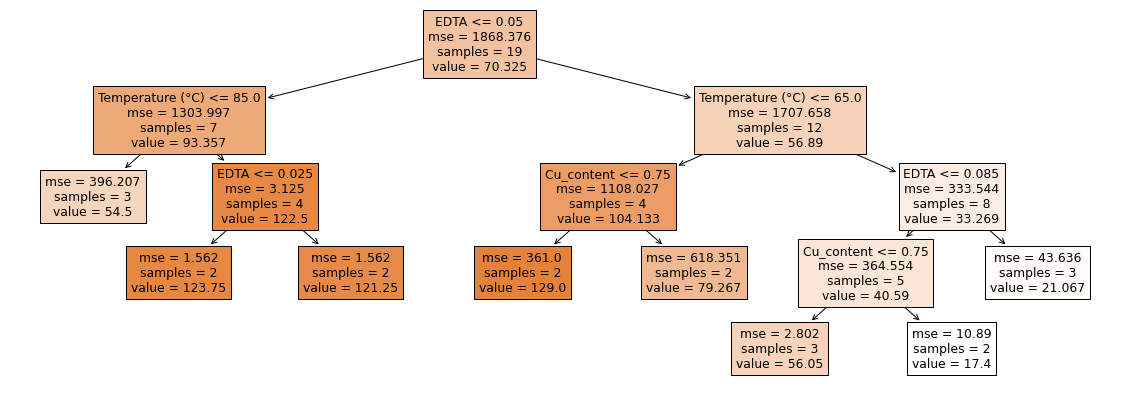

[54.5        54.5        54.5        54.5        21.06666667 54.5
 54.5        54.5        54.5        17.4        21.06666667 54.5
 21.06666667]
0


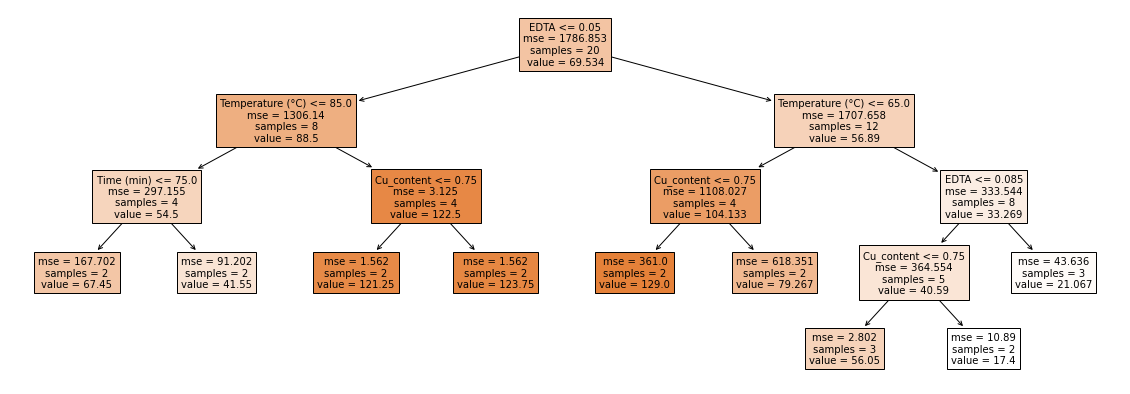

[67.45       67.45       41.55       21.06666667 41.55       41.55
 67.45       67.45       17.4        21.06666667 41.55       21.06666667]
0


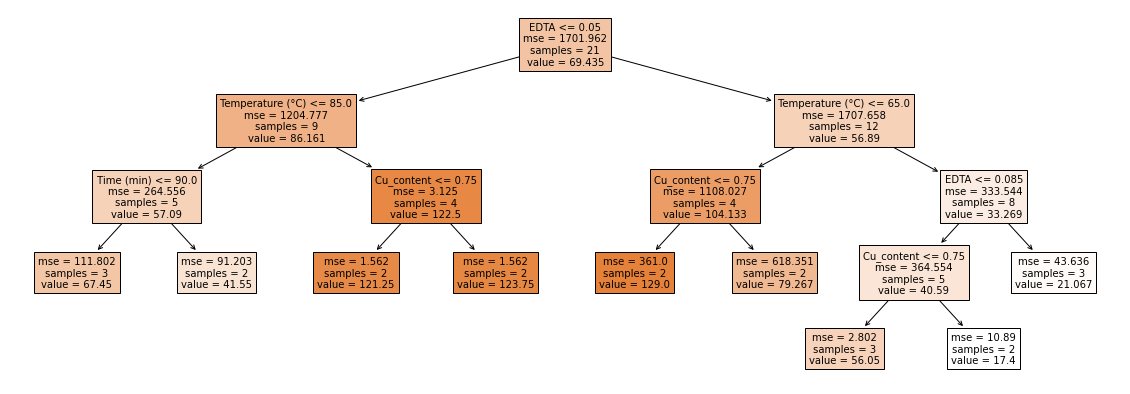

[67.45       41.55       21.06666667 67.45       41.55       67.45
 67.45       17.4        21.06666667 67.45       21.06666667]
0


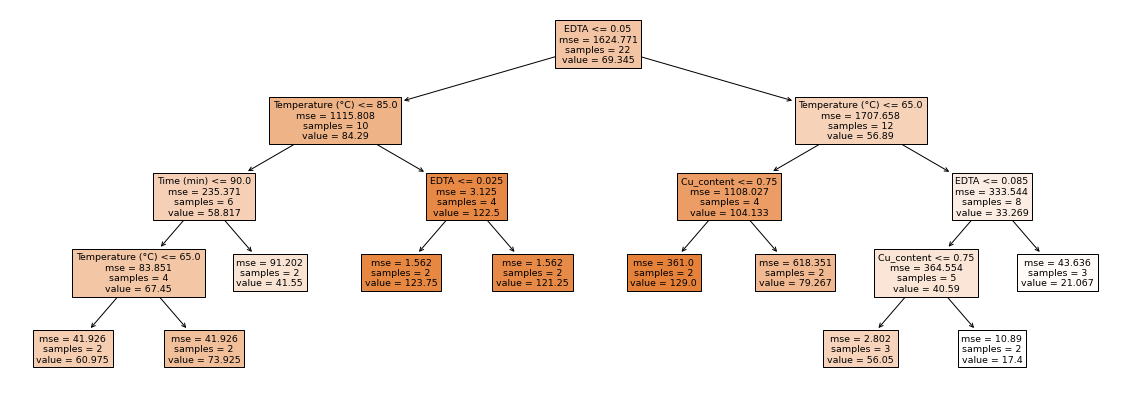

[41.55       21.06666667 73.925      41.55       60.975      60.975
 17.4        21.06666667 73.925      21.06666667]
2


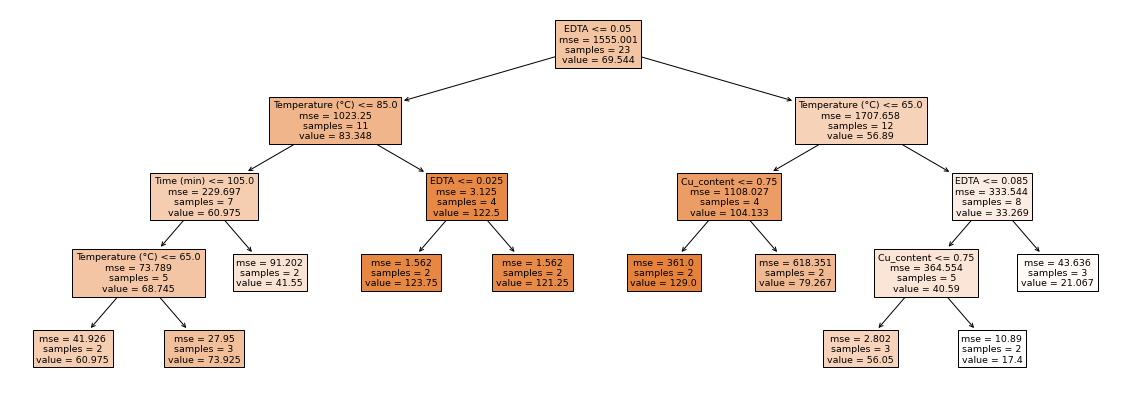

[41.55       21.06666667 41.55       60.975      60.975      17.4
 21.06666667 73.925      21.06666667]
7


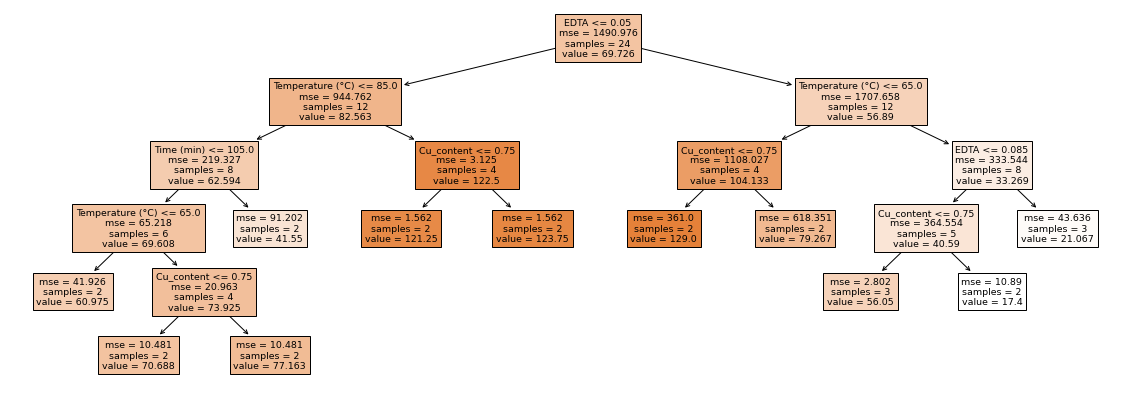

[41.55       21.06666667 41.55       60.975      60.975      17.4
 21.06666667 21.06666667]
3


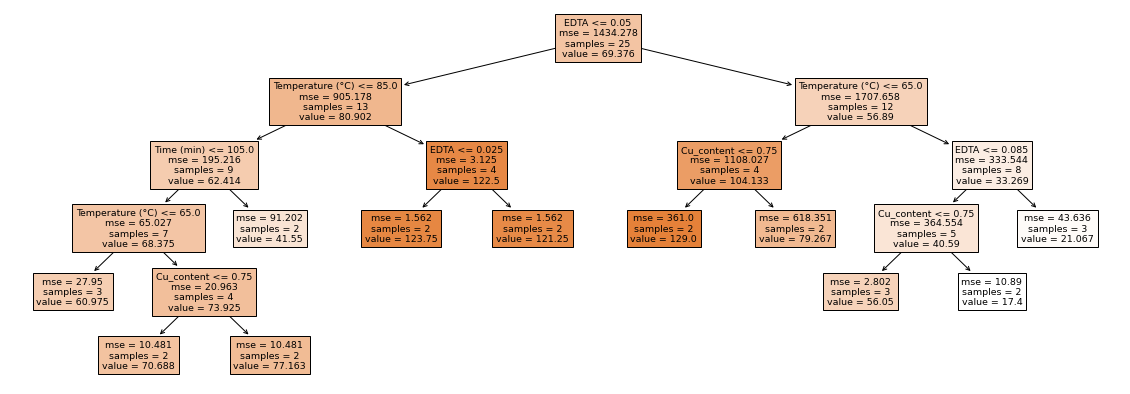

[41.55       21.06666667 41.55       60.975      17.4        21.06666667
 21.06666667]
3


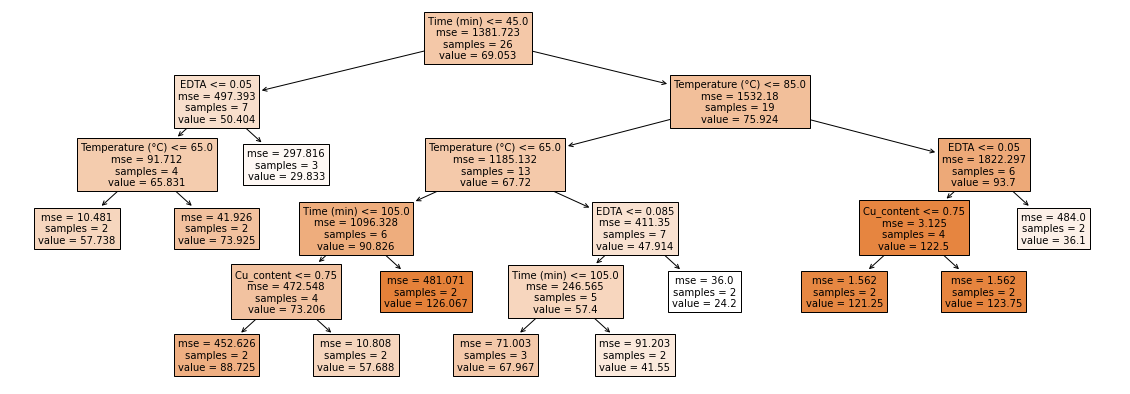

[41.55       24.2        41.55       67.96666667 24.2        29.83333333]
3


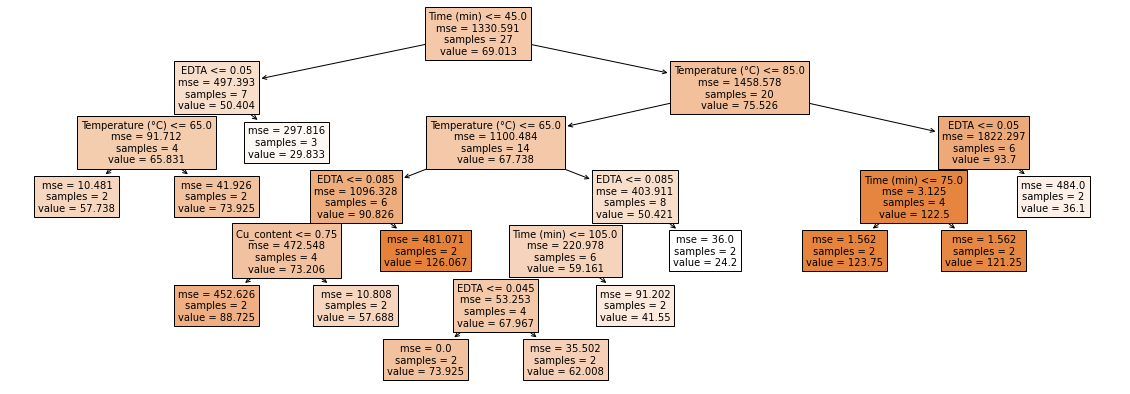

[41.55       24.2        41.55       24.2        29.83333333]
0


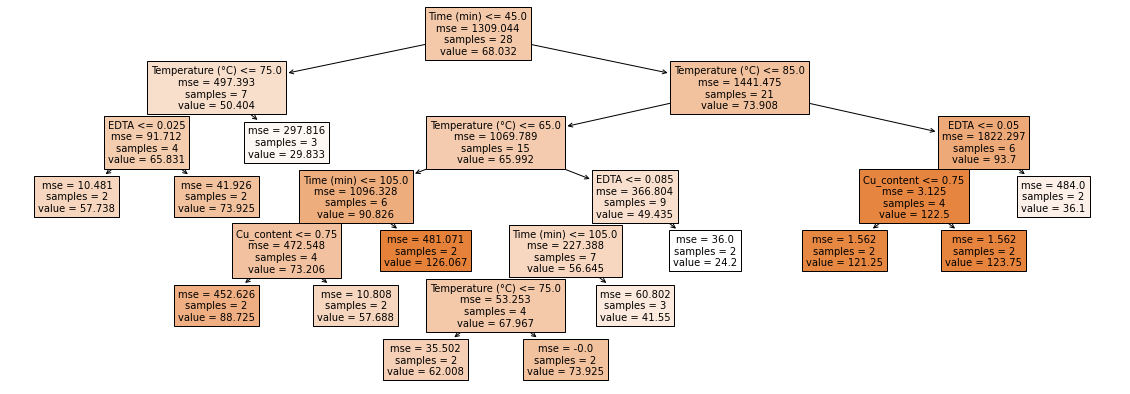

[24.2        41.55       24.2        29.83333333]
1


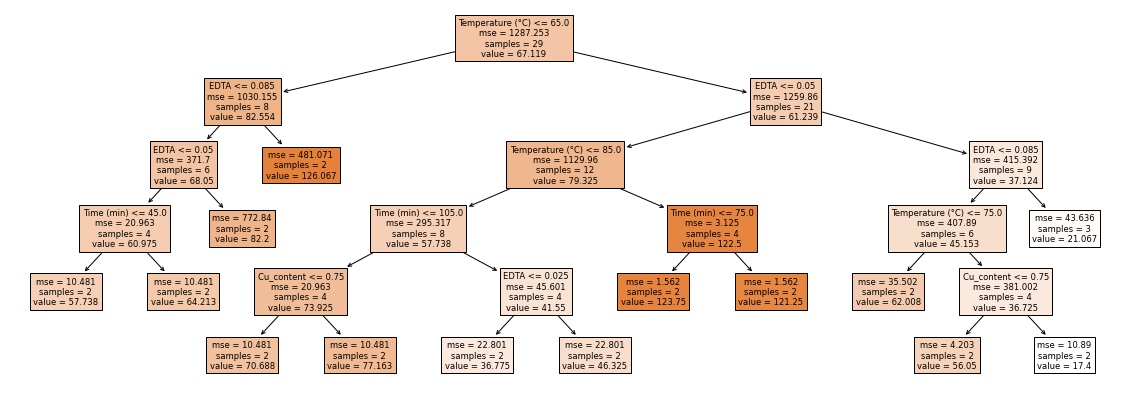

[21.06666667 21.06666667 21.06666667]
0


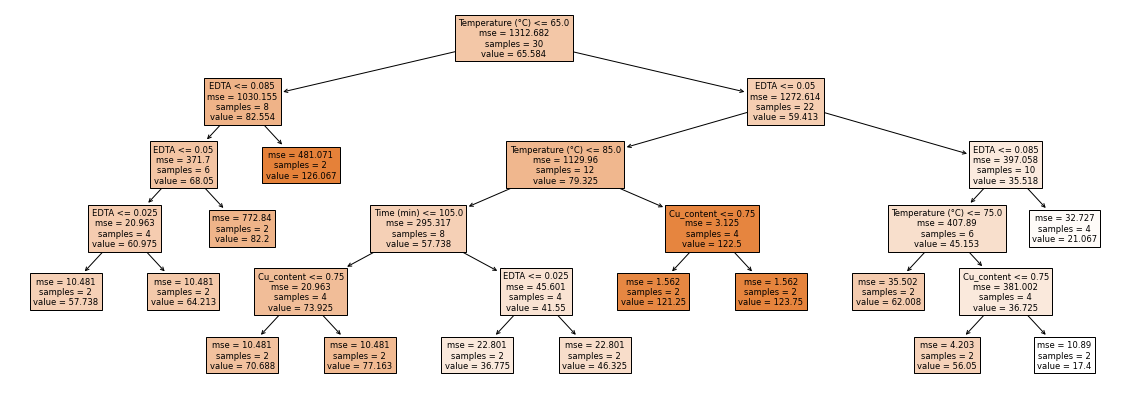

[21.06666667 21.06666667]
0


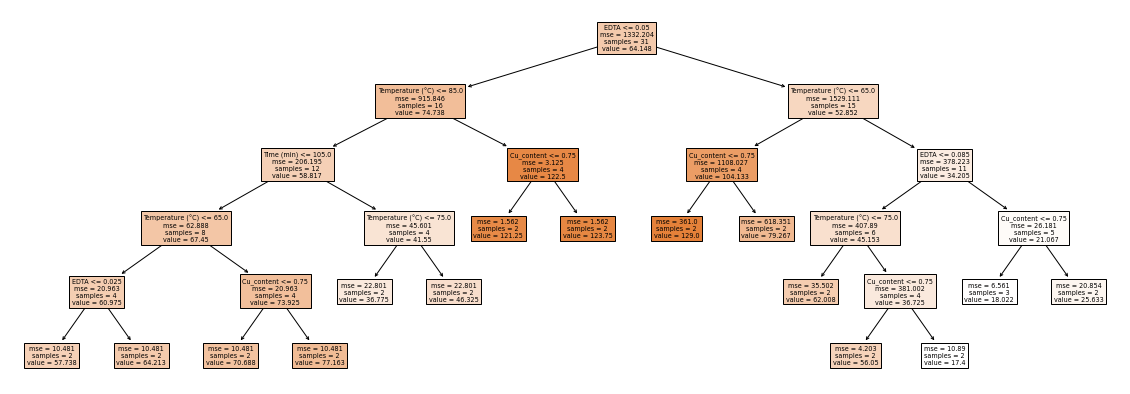

[25.63333333]
0


In [13]:
n_queries = 17
performance = []
y_pred_max = []
y_mes = []
for index in range(n_queries):
    model = DecisionTreeRegressor(min_samples_leaf=2)
    model.fit(X_lab,Y_lab)
    pred = model.predict(X_unlab)
    plt.figure(figsize=(20,7))
    plot_tree(model,feature_names = list(X.columns),filled=True)
    plt.show()
    print(pred)
    query_index, query_instance, label_i = strat_max(pred, X_unlab, Y_unlab)
    print(query_index)
# Teach our ActiveLearner model the record it has requested.
    y_pred_max.append(label_i)
    y_mes.append(Y_unlab[query_index])
    X_lab, Y_lab= np.vstack([X_lab, query_instance]), np.hstack([Y_lab, label_i])    
    X_unlab, Y_unlab = np.delete(X_unlab, query_index, axis=0), np.delete(Y_unlab, query_index)
    # Remove the queried instance from the unlabeled pool.
    #print(predictions)
    score = model.score(X,Y)
    performance.append(score)
    lab_indices.append(query_index)

Text(0, 0.5, 'PCE mesuré')

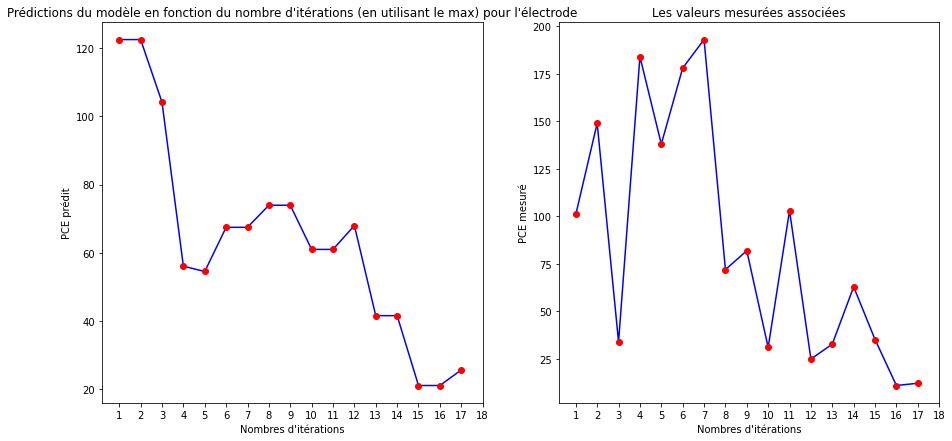

In [24]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Prédictions du modèle en fonction du nombre d'itérations (en utilisant le max) pour l'électrode")
plt.plot(np.arange(1, n_queries+1), y_pred_max, 'b')
plt.plot(np.arange(1, n_queries+1), y_pred_max, 'ro')
plt.xticks(np.linspace(1,n_queries+1,n_queries+1,endpoint=True))
plt.xlabel("Nombres d'itérations")
plt.ylabel("PCE prédit")
plt.subplot(1,2,2)
plt.title("Les valeurs mesurées associées")
plt.plot(np.arange(1, n_queries+1), y_mes, 'b')
plt.plot(np.arange(1, n_queries+1), y_mes, 'ro')
plt.xticks(np.linspace(1,n_queries+1,n_queries+1,endpoint=True))
plt.xlabel("Nombres d'itérations")
plt.ylabel("PCE mesuré")

Text(0, 0.5, 'Performance du modèle')

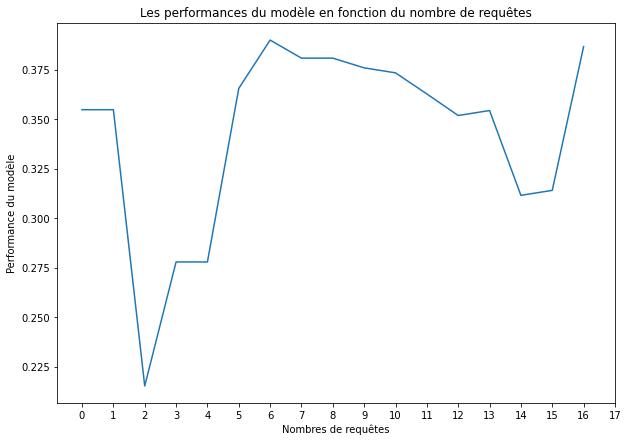

In [15]:
plt.figure(figsize=(10,7))
plt.title("Les performances du modèle en fonction du nombre de requêtes")
plt.plot(np.arange(n_queries), performance)
plt.xticks(np.linspace(0,n_queries,n_queries+1,endpoint=True))
plt.xlabel("Nombres de requêtes")
plt.ylabel("Performance du modèle")